In [1]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim, mean_squared_error

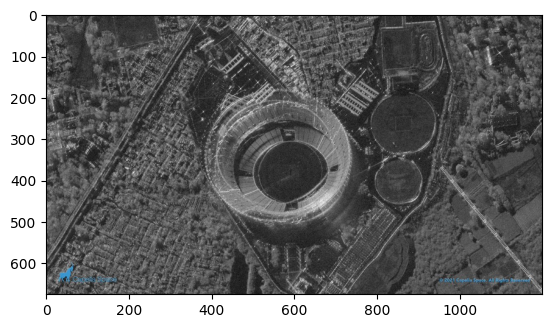

In [3]:
image = cv2.imread('sar_1.jpg')
#image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image)

In [4]:
mean = 0
stddev = 30
noise_gauss = np.zeros(image_gray.shape, dtype=np.float32)
cv2.randn(noise_gauss, mean, stddev)

array([[-4.8092843e-08,  4.7440519e+00, -2.1027840e+01, ...,
         3.3159554e+01, -5.8327069e+00,  2.3885614e+01],
       [ 3.0963665e-01,  3.1150524e+01,  2.0483101e+01, ...,
        -1.9306515e+01,  3.1037447e+01, -2.1161907e+01],
       [-3.2310444e+01, -9.4485092e+00,  1.5409666e+01, ...,
        -1.8176182e+01, -4.4733677e+00,  4.3535469e+01],
       ...,
       [-4.3538074e+01, -2.5289513e+01,  1.1766792e+01, ...,
         7.9199860e+01, -1.2416805e+01,  4.3532290e+00],
       [-1.1420868e+01,  1.0179449e+01, -5.4403687e+00, ...,
        -3.9336430e+01,  1.5958331e+00,  4.0401085e+01],
       [ 4.7937065e+01,  6.1199375e+01, -3.6484467e+01, ...,
         6.3491354e+00, -6.1358063e+01,  3.2596214e+01]],
      shape=(675, 1200), dtype=float32)

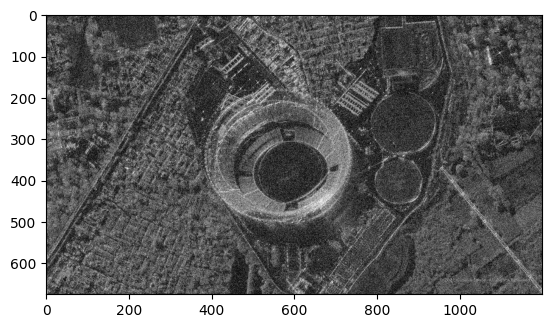

In [5]:
noisy_image = image_gray.astype(np.float32) + noise_gauss
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
plt.imshow(noisy_image, cmap='gray')

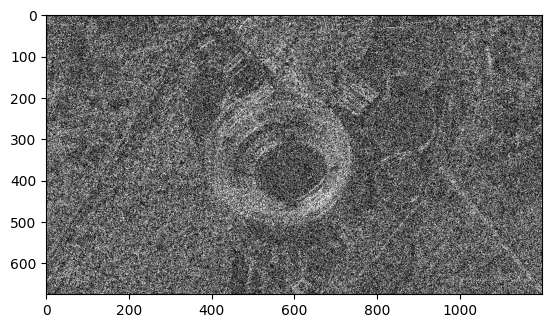

In [6]:
a = -210
b = 210

noise_uniform = np.random.uniform(a, b, image_gray.shape).astype(np.float32)

noisy_image_uniform = image_gray.astype(np.float32) + noise_uniform
noisy_image_uniform = np.clip(noisy_image_uniform, 0, 255).astype(np.uint8)
plt.imshow(noisy_image_uniform, cmap='gray')

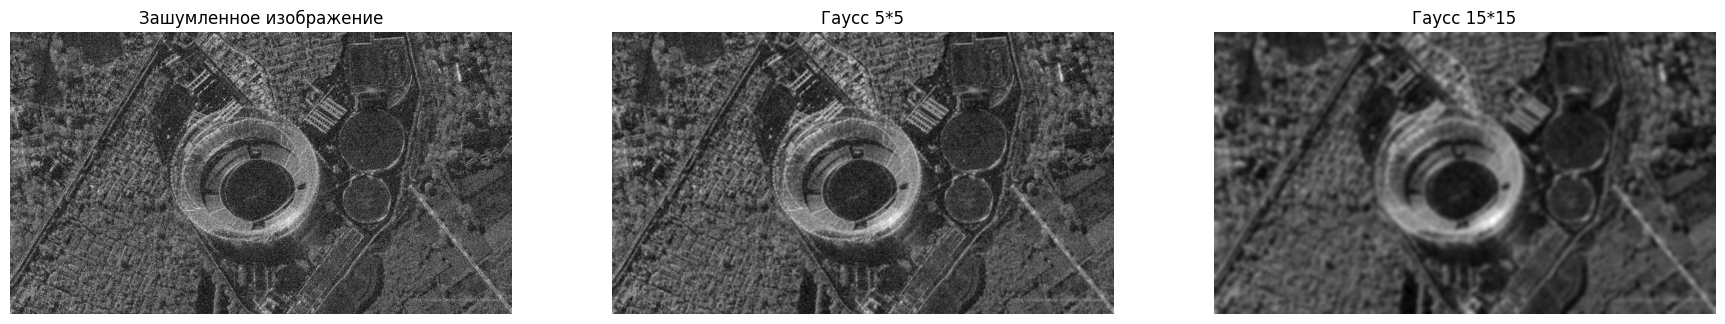

In [7]:
plt.figure(figsize=(22, 6))
plt.subplot(1,3,1)
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.title('Зашумленное изображение')
plt.subplot(1,3,2)
image_gauss_gauss = cv2.GaussianBlur(noisy_image, (5, 5), 0)
plt.axis('off')
plt.title('Гаусс 5*5')
plt.imshow(image_gauss_gauss, cmap='gray')
plt.subplot(1,3,3)
image_gauss_gauss1 = cv2.GaussianBlur(noisy_image, (15, 15), 5)
plt.axis('off')
plt.title('Гаусс 15*15')
plt.imshow(image_gauss_gauss1, cmap='gray')


In [8]:
mse_gauss = mean_squared_error(image_gray, image_gauss_gauss)
(ssim_gauss, diff) = ssim(image_gray, image_gauss_gauss, full=True)
print(mse_gauss, ssim_gauss)

176.7384024691358 0.6767833705109214


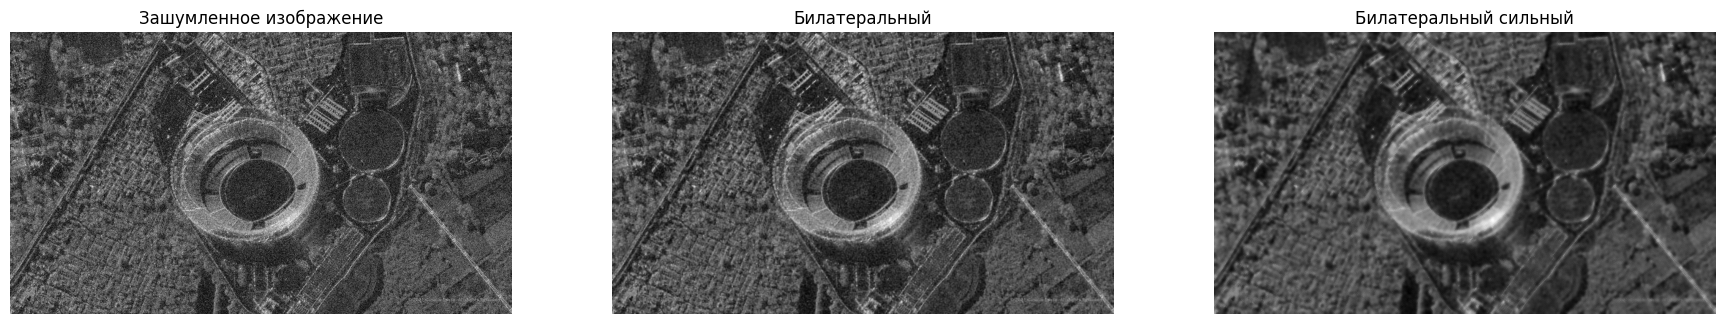

In [9]:
plt.figure(figsize=(22, 6))
plt.subplot(1,3,1)
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.title('Зашумленное изображение')
plt.subplot(1,3,2)
image_gauss_bilat = cv2.bilateralFilter(noisy_image, 5, 75, 75)
plt.imshow(image_gauss_bilat, cmap='gray')
plt.axis('off')
plt.title('Билатеральный')
plt.subplot(1,3,3)
image_gauss_bilat1 = cv2.bilateralFilter(noisy_image, 10, 100, 100)
plt.imshow(image_gauss_bilat1, cmap='gray')
plt.axis('off')
plt.title('Билатеральный сильный')
plt.show()

In [10]:
mse_bilat = mean_squared_error(image_gray, image_gauss_bilat)
(ssim_bilat, diff) = ssim(image_gray, image_gauss_bilat, full=True)
print(mse_bilat, ssim_bilat)

187.3289098765432 0.6647165001446498


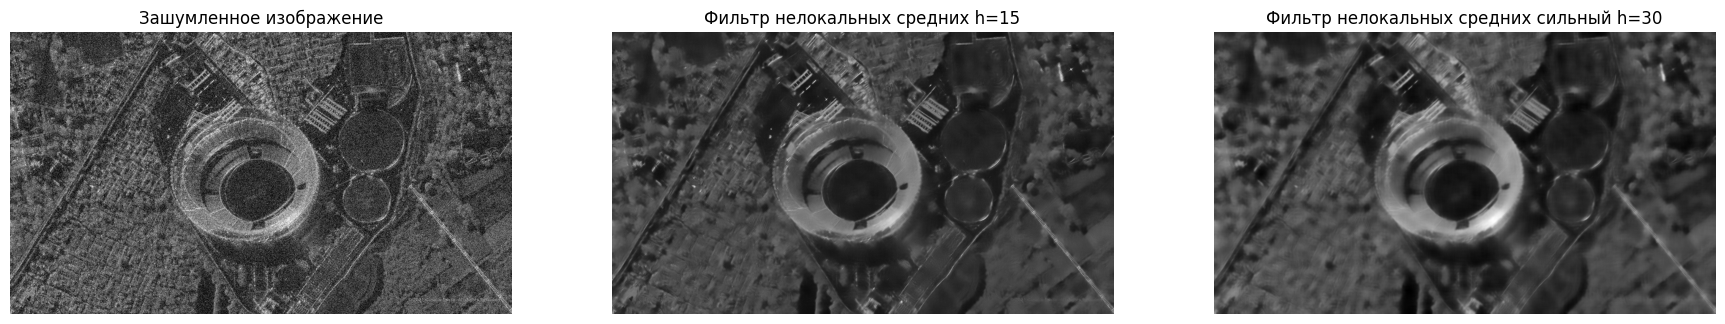

In [11]:
plt.figure(figsize=(22, 6))
plt.subplot(1,3,1)
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.title('Зашумленное изображение')
plt.subplot(1,3,2)
image_gauss_nlm = cv2.fastNlMeansDenoising(noisy_image, h = 30)
plt.imshow(image_gauss_nlm, cmap='gray')
plt.axis('off')
plt.title('Фильтр нелокальных средних h=15')
plt.subplot(1,3,3)
image_gauss_nlm1 = cv2.fastNlMeansDenoising(noisy_image, h = 50)
plt.imshow(image_gauss_nlm1, cmap='gray')
plt.axis('off')
plt.title('Фильтр нелокальных средних сильный h=30')
plt.show()

In [12]:
mse_nlm = mean_squared_error(image_gray, image_gauss_nlm,)
(ssim_nlm, diff) = ssim(image_gray, image_gauss_nlm, full=True)
print(mse_nlm, ssim_nlm)

251.14494444444443 0.5226421777605992
